In [6]:
    import os
    import numpy as np
    import matplotlib.pyplot as plt

In [7]:
import copy

In [8]:
dataset = {
"features": [],
"labels": [],
}
datasets = {
    "test": copy.deepcopy(dataset),
    "train": copy.deepcopy(dataset)
}

for root, dirs, files in os.walk("AssignmentData"):


    for name in files:
        path_split = root.split("\\")
        print(path_split[-2:])
        class_name = path_split[-2]
        test_or_train = path_split[-1]

        assert test_or_train in ("test", "train")
        if class_name not in classnames:
            classnames.append(class_name)
        label = classnames.index(class_name)
        imgFile = os.path.join(root, name)
        img = plt.imread(imgFile).ravel()
        if test_or_train == "test":
            print(f"{test_or_train=}")
            print(label)
        datasets[test_or_train]["features"].append(img)
        datasets[test_or_train]["labels"].append(label)
        
   #for name in dirs:
   #   print(os.path.join(root, name))

['dead', 'test']


NameError: name 'classnames' is not defined

In [11]:
def prep_data (folder):
    # iterate through folders, assembling feature, label, and classname data objects
    dataset = {
    "features": [],
    "labels": [],
    }
    datasets = {
        "test": copy.deepcopy(dataset),
        "train": copy.deepcopy(dataset)
    }
    classnames=[]
    for root, dirs, files in os.walk(folder):


        for name in files:
            path_split = root.split("\\")
            class_name = path_split[-2]
            test_or_train = path_split[-1]

            assert test_or_train in ("test", "train")
            if class_name not in classnames:
                classnames.append(class_name)
            label = classnames.index(class_name)
            imgFile = os.path.join(root, name)
            img = plt.imread(imgFile).ravel()
            datasets[test_or_train]["features"].append(img)
            datasets[test_or_train]["labels"].append(label)
    
    return datasets, classnames

In [14]:
# The images are in a folder named 'shapes/training'
training_folder_name =  'AssignmentData'

# Prepare the image data
datasets, classnames = prep_data(training_folder_name)

print(f"{len(classnames)}, {classnames=}")

2, classnames=['dead', 'live']


In [20]:
X_train = np.array(datasets["train"]["features"])
X_test = np.array(datasets["test"]["features"])
Y_train = np.array(datasets["train"]["labels"])
Y_test = np.array(datasets["test"]["labels"])

In [21]:
print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 70
Test records: 30


In [22]:
# Train the model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# Convert the training features to floats so they can be scaled
X_train_float = X_train.astype('float64')

# Our pipeline performs two tasks:
#   1. Normalize the image arrays
#   2. Train a classification model
img_pipeline = Pipeline([('norm', MinMaxScaler()),
                         ('classify', DecisionTreeClassifier()),
                        ])

# Use the pipeline to fit a model to the training data
print("Training model...")
clf = img_pipeline.fit(X_train_float, Y_train)

print('classifier trained!')

Training model...
classifier trained!


Classifier Metrics:
              precision    recall  f1-score   support

        dead       0.76      1.00      0.87        13
        live       1.00      0.76      0.87        17

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30

Accuracy: 86.67%

 Confusion Matrix:


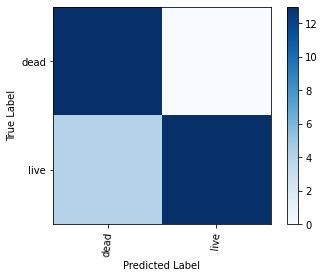

In [23]:
# Evaluate classifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert the test features for scaling
X_test_float = X_test.astype('float64')

print('Classifier Metrics:')
predictions = clf.predict(X_test)
print(metrics.classification_report(Y_test, predictions, target_names=classnames))
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(Y_test, predictions)))

print("\n Confusion Matrix:")
cm = confusion_matrix(Y_test, np.round(predictions, 0))
# Plot confusion matrix as heatmap
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
# Save the trained model
import sys
import os
import pickle

print ("Exporting the model")
file_stream = open('shape_classifier.pkl', 'wb')
pickle.dump(clf, file_stream)
file_stream.close()

Exporting the model
